In [1]:
import numpy as np
import pandas as pd
from scipy import spatial
from IPython.display import Image
import urllib
from io import StringIO
import urllib.request

## Preprocessing

In [2]:
import numpy as np
import pandas as pd
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

def data_cleaning(all_data,removeNa = True, rmPunctuation = True, rmNums = True, rmStopWords = True, rm_duplicate = True, further_process = True):
    
    all_data['alltext'] = all_data['alltext'].apply(lambda x: x.lower())
    
    if removeNa:
        all_data = all_data[all_data['alltext'].isnull() == False]

# You can define the punctuations you want to remove by yourself
    if rmPunctuation: 
        puncList = '!"#$&%\'()*+-,./:;<=>?@[\\]^_`{|}~'
        def rm_punc(s):
            s = re.sub('([a-z]+)\-([a-z]+)', '\\1\\2', s)
            for x in puncList:
                s=s.replace(x,' ')
            return s

        all_data['alltext'] = all_data['alltext'].apply(rm_punc)

# remove the stand-alone numbers
    if rmNums:
        def rm_nums(s):
            s = re.sub('\s+\d+\s+', '', s)
            s = re.sub('\d+', '', s)
            return s

        all_data['alltext'] = all_data['alltext'].apply(rm_nums)

# define a stop words list and remove them. 
    if rmStopWords:
        def rm_stop(s):
            stop = ['ASOS', "YAS", "Ditsy", "Noisy", "May", "Ted","Baker", "River","Island", "Karen","Scott","PrettyLittleThing","Roxy","DESIGN","Chi", \
               "Alfani","Boohoo","Sofie","Schnoor","Ellesse", "Jeannie","TFNC","Sacred", "Hawk","Urban","Bliss","Puma","adidas", "Stella", \
               'cm', 'size', 'web id', 'approx', 'model', 'height', 'is', 'and', 'she', 'wearing', 'small', 'approximate', 'measurements', 'height', 'bust', 'waist', 'hips']
            
            lst = r'|'.join([x.lower() for x in stop])
            return re.sub(lst,'',s)



        all_data['alltext'] = all_data['alltext'].apply(rm_stop)

# remove some duplicate descriptions (different items may have same descriptions if they are different only by colors)
    if rm_duplicate:
        all_data = all_data.drop_duplicates('alltext')
        
    lemtzer = WordNetLemmatizer()

    
# lemmatizing and stemming all the verbs.
    def lemmatize_stemming(text):
        return lemtzer.lemmatize(text, pos='v')

# apply the simple_preprocess provided by Gensim and do lemmatization and stemming.
    def preprocess(text):
        result=[]
        for token in simple_preprocess(text) :
            if token not in STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
            
        return ' '. join(result)
    
    if further_process:
         all_data['alltext'] = all_data['alltext'].apply(preprocess)


    return all_data





In [3]:
df_all = pd.read_csv('all.csv', index_col = 0)

In [4]:
df_all['alltext'][0]

'Cotton T-shirt T-shirt in lightweight cotton jersey with a rounded hem. Slightly longer at back. Front: Length: 63.0 cm (Size M)'

In [6]:
df_all2 = data_cleaning(df_all,removeNa = True, rmPunctuation = True, rmNums = True, rmStopWords = True, rm_duplicate = True, further_process = True)

In [7]:
df_all2['alltext'][0]

'cotton tshirt tshirt lightweight cotton jersey round slightly longer length'

In [15]:
df_all2

,alltext,brand,category,description,img_2,img_id,img_url,material,price,product_name,website,id
0,cotton tshirt tshirt lightweight cotton jersey...,HM,Top,T-shirt in lightweight cotton jersey with a ro...,NaN,0 Cotton T-shirt,https://lp2.hm.com/hmgoepprod?set=source[/7d/5...,Front: Length: 63.0 cm (Size M),$4.99,Cotton T-shirt,HM,0
1,vneck jersey longsleeved airy vcose jersey vne...,HM,Top,Long-sleeved top in airy viscose jersey with a...,NaN,1 V-neck Jersey Top,https://lp2.hm.com/hmgoepprod?set=source[/3d/e...,Viscose 100%,$14.99,V-neck Jersey Top,HM,1
2,jersey lace sleeveless soft vcose jersey lace ...,HM,Top,Sleeveless top in soft viscose jersey with lac...,NaN,2 Jersey Top with Lace,https://lp2.hm.com/hmgoepprod?set=source[/17/0...,Viscose 100%,$9.99,Jersey Top with Lace,HM,2
3,vneck conscious vneck airy jersey recycle poly...,HM,Top,CONSCIOUS. V-neck top in airy jersey made from...,NaN,3 V-neck Top,https://lp2.hm.com/hmgoepprod?set=source[/6c/8...,Polyester 100%,$9.99,V-neck Top,HM,3
4,jersey camole camole jersey narrow shoulder strap,HM,Top,Fitted camisole top in jersey with narrow shou...,NaN,4 Jersey Camisole Top,https://lp2.hm.com/hmgoepprod?set=source[/e4/8...,Fitted,$2.99,Jersey Camisole Top,HM,4
5,short tshirt short tshirt soft jersey contrast...,HM,Top,Short T-shirt in soft jersey with contrasting ...,NaN,5 Short T-shirt,https://lp2.hm.com/hmgoepprod?set=source[/74/7...,Cotton 60%; Polyester 40%,$9.99,Short T-shirt,HM,5
6,long tshirt long tshirt jersey sew cuff sleeve...,HM,Top,Long T-shirt in jersey with sewn cuffs on slee...,NaN,6 Long T-shirt,https://lp2.hm.com/hmgoepprod?set=source[/0a/8...,Short sleeve,$9.99,Long T-shirt,HM,6
7,tshirt tshirt soft jersey,HM,Top,Fitted T-shirt in soft jersey.,NaN,7 T-shirt,https://lp2.hm.com/hmgoepprod?set=source[/0c/9...,Fitted,$4.99,T-shirt,HM,7
8,tshirt tshirt soft vcoseblend jersey cottonvcose,HM,Top,"T-shirt in soft, viscose-blend jersey.",NaN,8 T-shirt,https://lp2.hm.com/hmgoepprod?set=source[/e5/b...,Cotton 60%; Viscose 40%,$4.99,T-shirt,HM,8
9,vneck camole vneck camole soft vcose jersey do...,HM,Top,V-neck camisole top in soft viscose jersey. Do...,NaN,9 V-neck Camisole Top,https://lp2.hm.com/hmgoepprod?set=source[/7b/3...,Lining: Polyester 100%,$17.99,V-neck Camisole Top,HM,9


## Word2vec

### Function Defination

In [22]:
import numpy as np
from scipy import spatial
import pandas as pd
import re


# Load pre-trained model
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r',encoding="utf8")#
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
        if len(model) % 19000== 0:
            print("+1")
    print ("Done.",len(model)," words loaded!")
    return model


# For a single document, calculate the average vector of all the token in this sentence
def calcAvg(s,model, avgVec = True):
    words = s.split()
    words_count = len(words)
    embedding_dim = 300   # since the model we used has 300 dimensions. This parameter need to be changed accordingly. 
    embedding_matrix = np.zeros((words_count, embedding_dim))  # Generate a matrix to store the word vectors and initialize it using zeros
    i = 0
    for word in words:
        embedding_vector = model.get(word)

        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
        i+=1

    if avgVec:
        return embedding_matrix.mean(axis = 0)
    else:
        return embedding_matrix  # if you do not want to take average you can have the matrix. 


# for any two items in the df (id = i and j), calculate the cosine distance between them. 
def similarity_score(df, i,j,model):
#     vec1 = calcAvg(df.iloc[i,0], model)
#     vec2 = calcAvg(df.iloc[j,0], model)

    vec1 = calcAvg(df[df['id'] == i]['alltext'].tolist()[0], model)
    vec2 = calcAvg(df[df['id'] == j]['alltext'].tolist()[0], model)

    score = 1-spatial.distance.cosine(vec1,vec2)

    return score


# for any given item(id = i), find the top 10 (or user defined number) items that are most similar. 

def find_similar(df, i, model, count = 10):
    score_dic = {}


    for j in df['id']:
        score_dic[j] = similarity_score(df,i,j, model)
        
    sorted_by_value = sorted(score_dic.items(), key=lambda kv: kv[1], reverse = True)
    result_lis = [x[0] for x in  sorted_by_value[0:count]]

    input_img = './product_images/{}.jpg'.format(i)
    
    print('######### The selected image ########')
    display(Image(filename = input_img, width=200, height=200))
    print(50*'#')
    for m in result_lis:
        file_name = './product_images/{}.jpg'.format(m)

        print('{}.jpg | similarity score: {} | from: {}'.format(m, score_dic[m], df['website'][m]) )
        display(Image(filename = file_name, width=200, height=200))




In [9]:
preTrainedModel = loadGloveModel("./models/glove.42B.300d.txt")

Loading Glove Model
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
Done. 1917494  words loaded!


In [17]:
similarity_score(df_all2, 3,5, preTrainedModel)

0.8818182584301233

######### The selected image ########


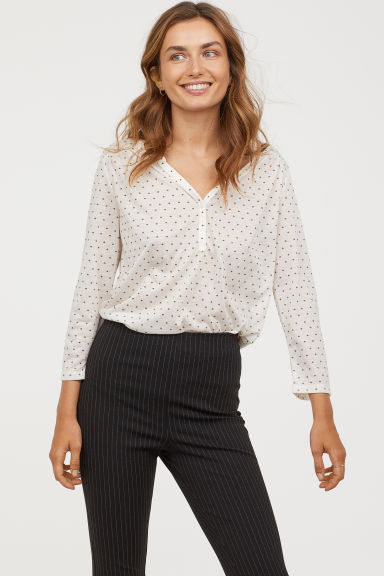

##################################################
3.jpg | similarity score: 1.0 | from: HM


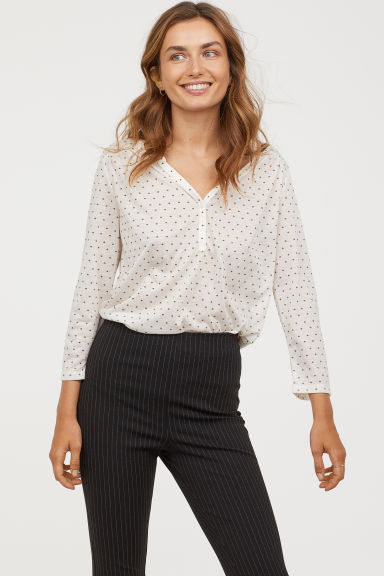

37.jpg | similarity score: 0.9301667954646671 | from: HM


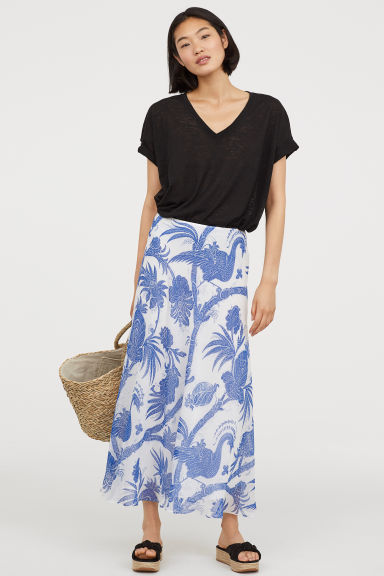

9.jpg | similarity score: 0.9288165383440854 | from: HM


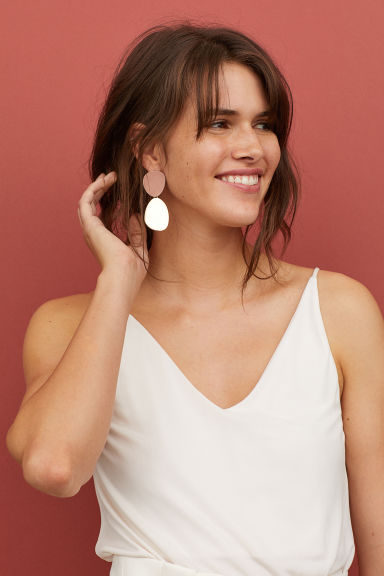

1039.jpg | similarity score: 0.9262965907127823 | from: HM


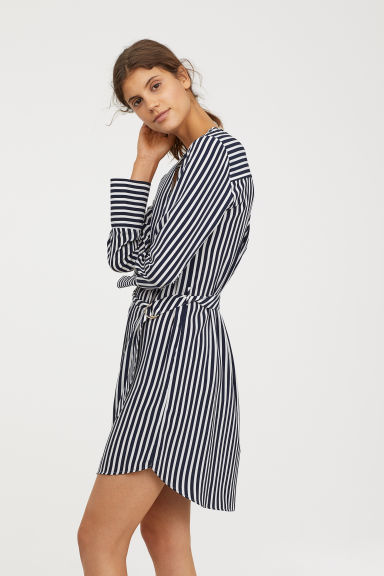

6683.jpg | similarity score: 0.9240867196723734 | from: ASOS


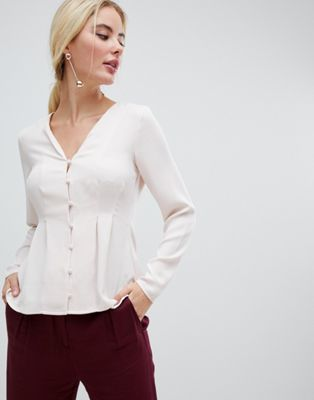

2297.jpg | similarity score: 0.9233239463874895 | from: Bloomingdales


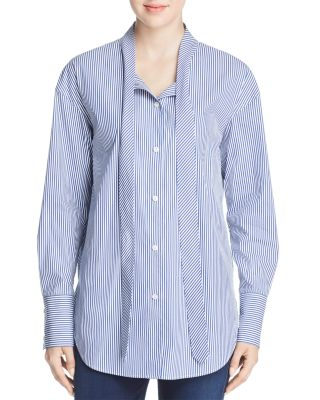

986.jpg | similarity score: 0.9230020093970508 | from: HM


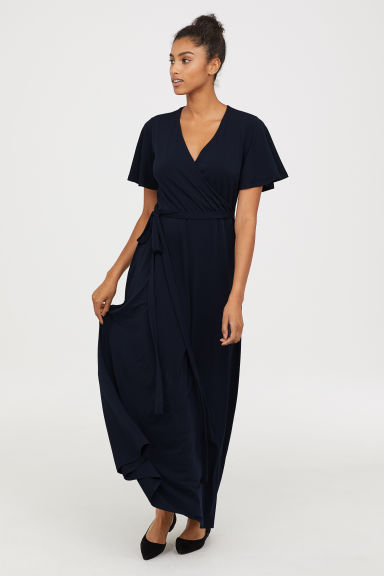

5354.jpg | similarity score: 0.9215363891024848 | from: ASOS


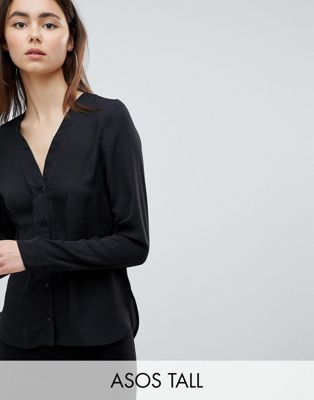

2885.jpg | similarity score: 0.9211523196649382 | from: Bloomingdales


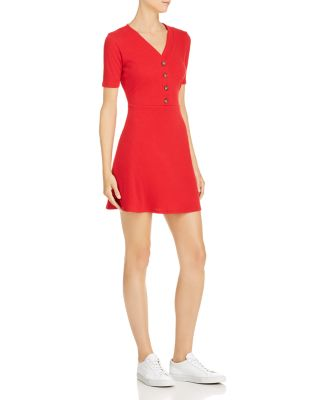

854.jpg | similarity score: 0.920330585424799 | from: HM


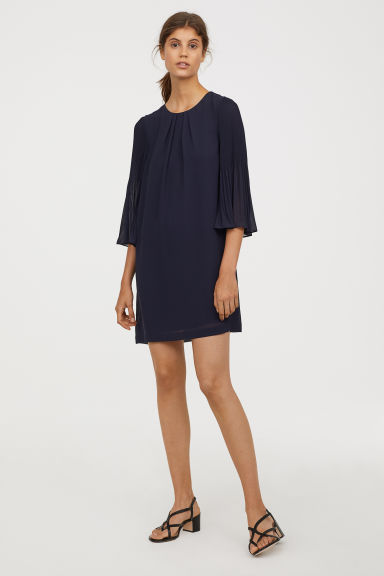

In [23]:
find_similar(df_all2, 3, preTrainedModel, count = 10)

## Doc2Vec

In [24]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [25]:
# Define a class MyDocs to read in the documents.
# In our case we read in the 'alltext' column and use 'id' as the label.

from gensim.utils import simple_preprocess
class MyDocs(object):
    def __iter__(self):
        for i in range(df_all2.shape[0]):
            yield TaggedDocument(words=simple_preprocess(df_all2.iloc[i,0]), tags=['%d' % df_all2.iloc[i,11]])

In [30]:
%%time

import multiprocessing
import os
cores = multiprocessing.cpu_count()

# if there is not pretrained model just train it. Otherwise use the available model. 
if not os.path.exists('models/doc2vec.model'):
    print("start traing doc2vec model...")
    documents = MyDocs()
    doc2vec_model = Doc2Vec(dm=1, dbow_words=1, vector_size=300, window=3, min_count=2, workers=cores)  # window is an important parameter
    doc2vec_model.build_vocab(documents) # Build vocabulary from a sequence of sentences
    doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=100) # epochs is an important parameter to tune
    if not os.path.exists('models'):
        os.makedirs('models')
        doc2vec_model.save('models/doc2vec.model')
    else:
        doc2vec_model.save('models/doc2vec.model')
else:
    doc2vec_model = Doc2Vec.load('models/doc2vec.model')

start traing doc2vec model...
CPU times: user 2min 14s, sys: 27.4 s, total: 2min 41s
Wall time: 1min 52s


In [31]:
def printSimilar(df, i, model, count = 10):
    tup_list = model.docvecs.most_similar(i, topn=count)
#    res_lis = [x[0] for x in tup_list]
    print(tup_list)
    
    input_img = './product_images/{}.jpg'.format(i)
    display(Image(filename = input_img, width=200, height=200))
    print('#'*50)

    for m in tup_list:
        file_name = './product_images/{}.jpg'.format(m[0])

        display(Image(filename = file_name, width=200, height=200))
        print('{}.jpg | similarity score: {} | from: {}'.format(m[0], m[1], df[df['id'] == i]['website'].tolist()[0]))


[('363', 0.6506378650665283), ('570', 0.6239693760871887), ('1059', 0.5993163585662842), ('41', 0.5906274914741516), ('639', 0.5894476175308228), ('12', 0.5782629251480103), ('246', 0.5649856328964233), ('643', 0.5546581745147705), ('86', 0.5532205700874329), ('1078', 0.5488868951797485)]


/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


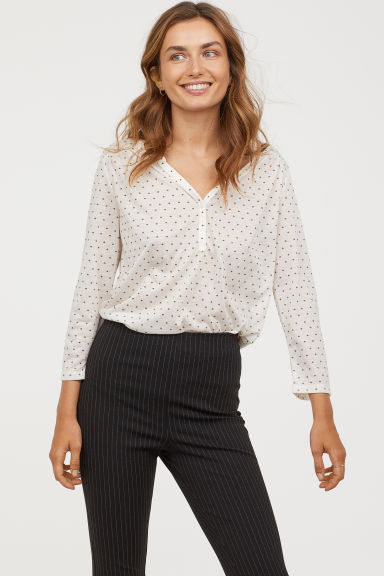

##################################################


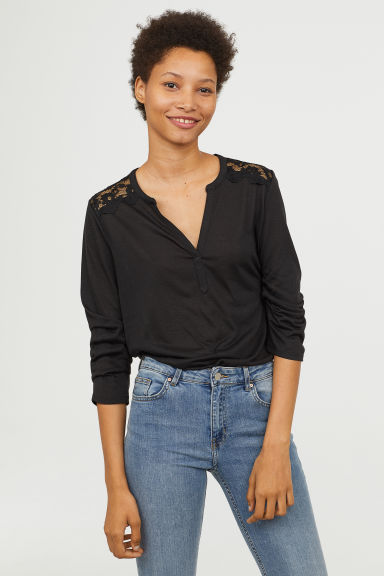

363.jpg | similarity score: 0.6506378650665283 | from: HM


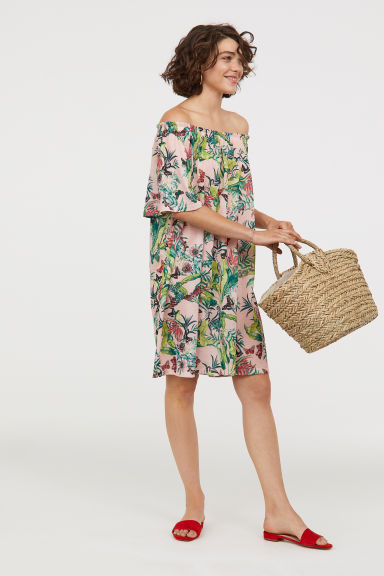

570.jpg | similarity score: 0.6239693760871887 | from: HM


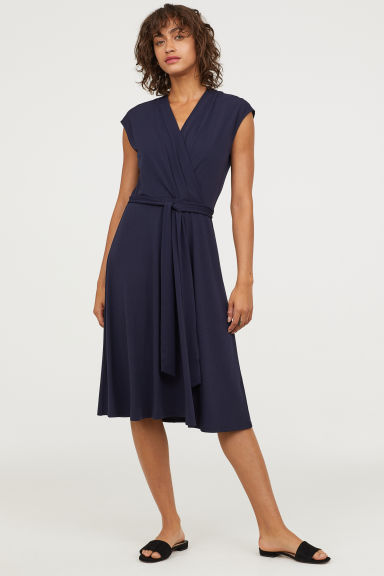

1059.jpg | similarity score: 0.5993163585662842 | from: HM


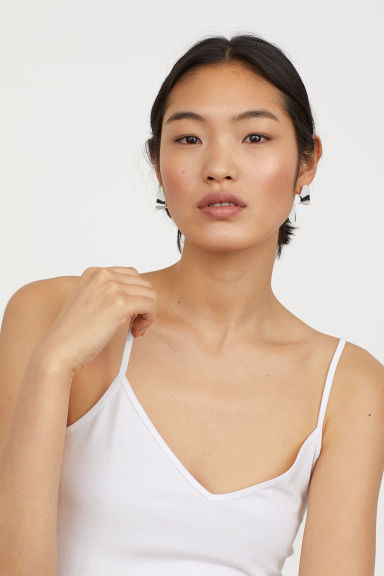

41.jpg | similarity score: 0.5906274914741516 | from: HM


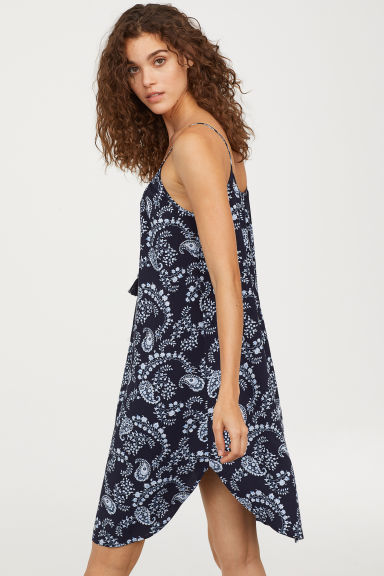

639.jpg | similarity score: 0.5894476175308228 | from: HM


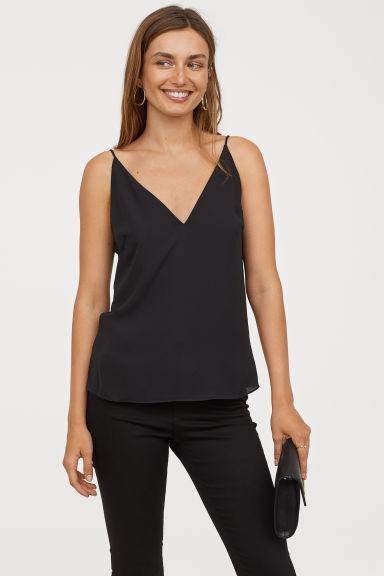

12.jpg | similarity score: 0.5782629251480103 | from: HM


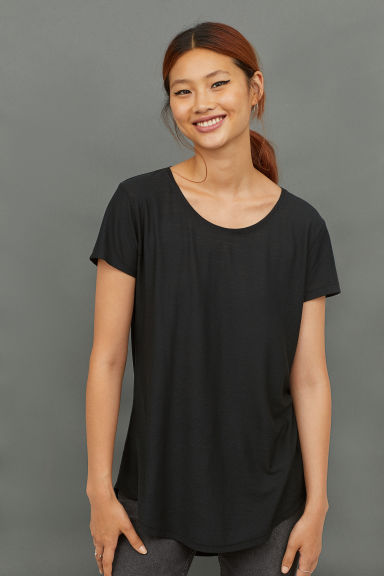

246.jpg | similarity score: 0.5649856328964233 | from: HM


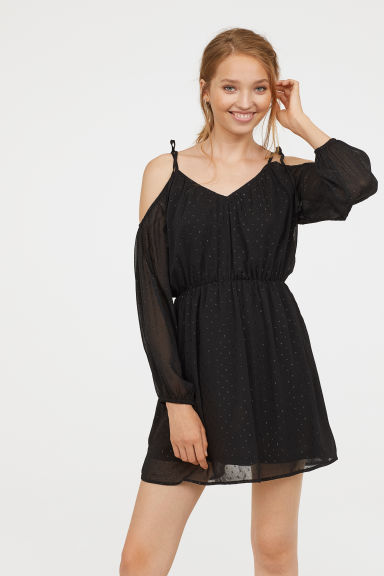

643.jpg | similarity score: 0.5546581745147705 | from: HM


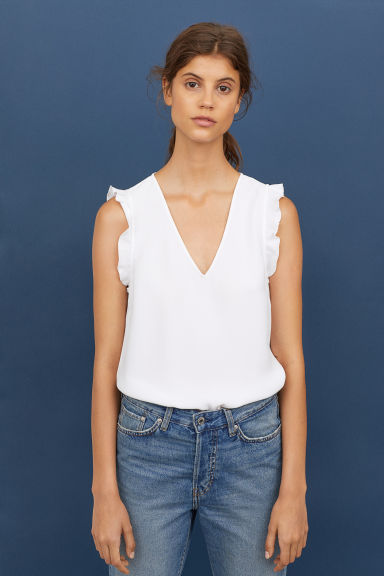

86.jpg | similarity score: 0.5532205700874329 | from: HM


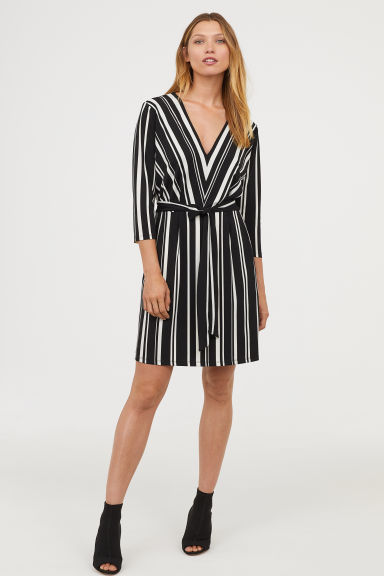

1078.jpg | similarity score: 0.5488868951797485 | from: HM


In [32]:
printSimilar(df_all2, 3, doc2vec_model)